In [1]:
import requests
import random
import json

base_url = "http://localhost:6083"

resp = requests.get(base_url)
assert resp.status_code == 404
assert resp.json()["status"] == 404
assert resp.json()["error"] == "Not Found"


In [2]:

resp = requests.get("%s/api/docs/swagger.json"%base_url)
assert resp.status_code == 200
assert resp.json()["swagger"] == "2.0"
assert resp.json()["paths"] != None

swaggerJson = resp.json()
swaggerJson["paths"].keys()

jsonUrls = [f for f in swaggerJson["paths"].keys() if ".json" in f]
print(jsonUrls)
jsonUrl = jsonUrls[0]

resp = requests.get("%s%s"%(base_url, jsonUrl))
assert resp.status_code == 200


['/api/docs/TrainingCertificate.json', '/api/docs/Issuer.json', '/api/docs/Schema.json', '/api/docs/DocumentType.json']


In [3]:
resp.json()

{'TrainingCertificate': {'$id': '#/properties/TrainingCertificate',
  'type': 'object',
  'title': 'The TrainingCertificate Schema',
  'required': ['name', 'contact'],
  'properties': {'name': {'type': 'string'},
   'trainingTitle': {'type': 'string'},
   'contact': {'type': 'string'},
   'createdAt': {'type': 'string', 'format': 'date'},
   'note': {'type': 'string'}}}}

In [4]:
entities = list(resp.json().keys())
print("Available entities ", entities)

Available entities  ['TrainingCertificate']


In [5]:
entity_name=entities[0]
print("Using entity %s"%entity_name)


Using entity TrainingCertificate


In [6]:
userId =str(random.randint(1e10,1e11))
resp = requests.post("%s%s"%(base_url, '/api/v1/%s'%entity_name), json={
    "name":"Sunbird Learner", 
    "contact": userId, 
    "trainingTitle":"Sunbird RC Certificate Module"
    
})
assert resp.status_code == 200 or print (resp.json())
idx = resp.json()["result"][entity_name]["osid"]


In [7]:
resp.json()


{'id': 'open-saber.registry.create',
 'ver': '1.0',
 'ets': 1652182355334,
 'params': {'resmsgid': '',
  'msgid': '24bde6de-cba6-4f52-979d-551a2c182ee2',
  'err': '',
  'status': 'SUCCESSFUL',
  'errmsg': ''},
 'responseCode': 'OK',
 'result': {'TrainingCertificate': {'osid': '1-f03e67e2-20f7-4a10-9b46-af1b81aa89cc'}}}

In [8]:
print(resp.json())
resp.status_code, userId


{'id': 'open-saber.registry.create', 'ver': '1.0', 'ets': 1652182355334, 'params': {'resmsgid': '', 'msgid': '24bde6de-cba6-4f52-979d-551a2c182ee2', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}, 'responseCode': 'OK', 'result': {'TrainingCertificate': {'osid': '1-f03e67e2-20f7-4a10-9b46-af1b81aa89cc'}}}


(200, '38107862399')

In [9]:
resp = requests.get("%s/api/v1/%s/%s"%(base_url, entity_name, idx), headers={"Accept":"application/vc+ld+json"})
print(json.dumps(resp.json()))
assert resp.json()["proof"]["type"] == "Ed25519Signature2018"


{"@context": ["https://www.w3.org/2018/credentials/v1", "https://gist.githubusercontent.com/dileepbapat/eb932596a70f75016411cc871113a789/raw/498e5af1d94784f114b32c1ab827f951a8a24def/skill"], "type": ["VerifiableCredential"], "issuanceDate": "2021-08-27T10:57:57.237Z", "credentialSubject": {"type": "Person", "name": "Sunbird Learner", "trainedOn": "Sunbird RC Certificate Module"}, "issuer": "did:web:sunbirdrc.dev/vc/skill", "proof": {"type": "Ed25519Signature2018", "created": "2022-05-10T11:32:35Z", "verificationMethod": "did:india", "proofPurpose": "assertionMethod", "jws": "eyJhbGciOiJFZERTQSIsImI2NCI6ZmFsc2UsImNyaXQiOlsiYjY0Il19..jup-zt0rwf1UsE8rv93pz9adrFBlzhBqh0JnYI2DPsgxTE-VcQMMY6cLY97HY0yXFwAk8jSEp3B15GzeuJwUBA"}}


In [10]:
resp = requests.get("%s/api/v1/%s/%s"%(base_url, entity_name, idx), headers={"Accept":"application/pdf", "template": "https://raw.githubusercontent.com/dileepbapat/ref-sunbirdrc-certificate/main/schemas/templates/TrainingCertificate.html"})


In [11]:
(resp.status_code, resp.content)

assert resp.content[:5].decode().startswith("%PDF")
with open('sample.pdf', 'wb') as f:
    f.write(resp.content)

%system open 'sample.pdf'

[]

In [12]:
resp = requests.get("%s/api/v1/%s/%s"%(base_url, entity_name, idx), headers={"Accept":"application/pdf", "template-key": "html"})
(resp.status_code, resp.content)

assert resp.content[:5].decode().startswith("%PDF")
with open('sample.pdf', 'wb') as f:
    f.write(resp.content)
    %system open 'sample.pdf'

In [13]:
%system open 'sample.pdf'

[]

200 b'<html lang="en">\n<head>\n    <style>\n        .line{text-align:center;font-family: \'Imperial Script\';font-size: 2em;}\n    </style>\n</head>\n<body style="width: 900px">\n<div style="margin: 1em;border: 3px solid darkgoldenrod;border-radius: 5px;background-color: lightgoldenrodyellow;height: 600px">\n    <div style="padding:1em;text-align:center;font-family: Canterbury;font-size: 4em;">Certificate of Training</div>\n    <table width="100%"><tr>\n        <td valign="bottom">\n    </td><td>\n    <div class="line">\n        <div>This is to certify that</div>\n        <div><b>Sunbird Learner</b></div>\n        <div>has successfully completed training requirements for</div>\n        <div style="padding: 1em;font-family: \'Open Sans\', sans-serif">Sunbird RC Certificate Module </div>\n        <div>and is awarded this certificate on </div>\n        <div>Tuesday, May 10th 2022</div>\n\n    </div>\n    </td></tr></table>\n</div>\n</div>\n<div>\n\n</div>\n</body>\n</html>'

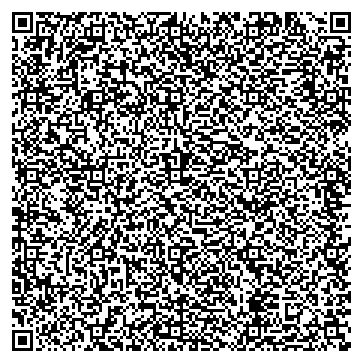

[]

In [20]:
resp = requests.get("%s/api/v1/%s/%s"%(base_url, entity_name, idx), headers={"Accept":"text/html","template-key": "html"})
print(resp.status_code, resp.content)

assert resp.content[:5].decode().startswith("<html")
with open('sample.html', 'wb') as f:
    f.write(resp.content)
%system open 'sample.html'


AssertionError: 